In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
#datasource:'https://www.kaggle.com/mohansacharya/graduate-admissions#Admission_Predict.csv'
PATH = 'unit3_data/Admission_Predict.csv'
data_raw = pd.read_csv(PATH)
data_raw.head()

#rename cloumns properly, use list(df) to get existing list, then rename and use df.columns to rename
col_list = ['Serial_No',
 'GRE_Score',
 'TOEFL_Score',
 'University_Rating',
 'SOP',
 'LOR',
 'CGPA',
 'Research',
 'Chance_of_Admit']
data_raw.columns = col_list

#drop serial_NO
data_raw = data_raw.loc[:, 'GRE_Score':'Chance_of_Admit']
data_raw.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### Data Exploration
https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/

**Predictor variables list:** GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, and Research 
**Target Variable list:** Chance of Admit



##### Univariate Analysis

In [4]:
#describe data
data_raw.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


**Conclusion:** Our nuivarite data looks clean, no outliers, the means and stds are also moderate.

##### Bivariate Analysis

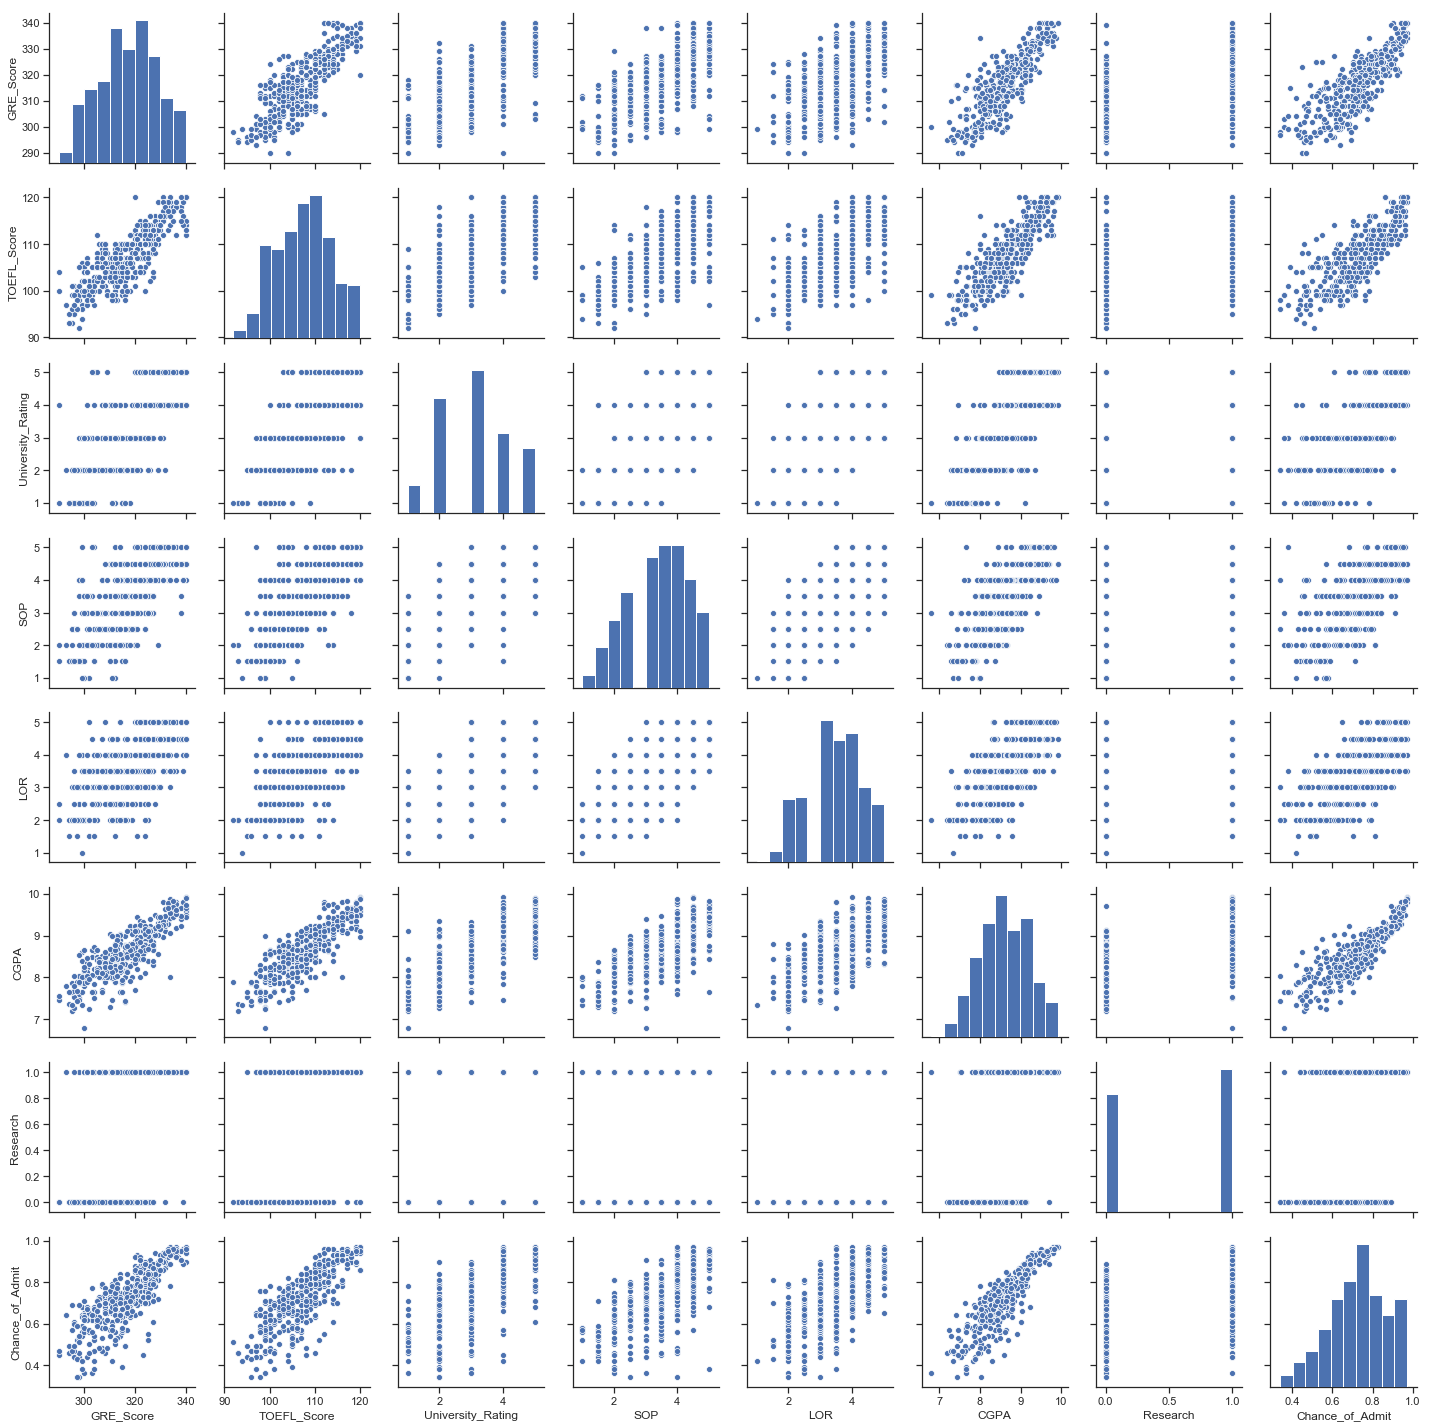

In [5]:
#pair plot to see relationship
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data_raw)

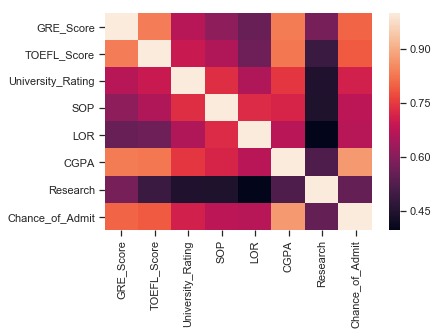

In [6]:
#let's check for correllation among variables
ax = sns.heatmap(data_raw.corr())


### Features Engineering

**As we can see from the heat map, we have high correlation between GRE/TOEFL and SOP/LOR/University_ratings. These variable will be combined into 2 new features. But first we will scale all the data columns. But first we will scale all the data column.** 


In [7]:
#scale all data column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_raw_scaled = pd.DataFrame(scaler.fit_transform(data_raw), columns=data_raw.columns)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [8]:
#ceate features using correlated variable
data_raw_scaled['GRE_TOEFL'] = data_raw_scaled[['GRE_Score', 'TOEFL_Score']].mean(axis=1)
data_raw_scaled['SOP_LOR_University_ratings'] = data_raw_scaled[['SOP', 'LOR', 'University_Rating']].mean(axis=1)

# we will now delete cols that we created features from and seperate the oucome from the independent variables
data_raw_scaled.drop(data_raw_scaled.columns[0:5], axis=1, inplace=True)

#Target variable
Y = data_raw_scaled.Chance_of_Admit
X = data_raw_scaled.drop(['Chance_of_Admit'], axis=1)

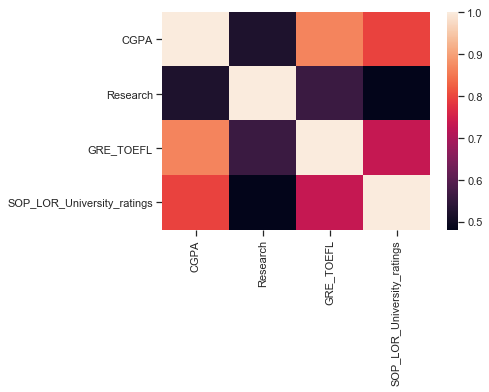

In [9]:
#let's check for correllation among variables
ax = sns.heatmap(X.corr())

### Our data is now ready for modelling. We will start with KNN regression then move on to OLS

### Let's start with KNN regression

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors = 10)
knn.fit(X, Y)

#perform cross validation and orint the scores (ave rsquared and it's variability)
score = cross_val_score(knn, X, Y, cv=5)
print("Non Weighted Model Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Non Weighted Model Accuracy: 0.72 (+/- 0.17)


In [11]:
from sklearn.model_selection import cross_val_score
from sklearn import neighbors
knn_w = neighbors.KNeighborsRegressor(n_neighbors = 10, weights='distance')
knn_w.fit(X, Y)

#perform cross validation and orint the scores (ave rsquared and it's variability)
score = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Model Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Weighted Model Accuracy: 0.72 (+/- 0.16)


### OLS MODEL

In [14]:
from sklearn.linear_model import LinearRegression
ols_reg = LinearRegression().fit(X, Y)
ols_reg.score(X, Y)

0.799303983124308

In [25]:
score_ols = cross_val_score(ols_reg, X, Y, cv=5)
score_ols

array([0.65637785, 0.76640585, 0.78095266, 0.83047305, 0.81836015])

##### From above, the OLS model seems to perform better. There's still a lot to do in terms of playing arround with the features and rerunning the models before the altimate conclusion of picking a model. I will possibly come back to this assignment to iterate more after learning more about model evaluation.